# IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, t
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind

# FETCHING THE DATASET

In [2]:
df = pd.read_csv('QVI_data.csv')

# PERFORMING BASIC CHECKS

In [3]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [5]:
df.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [6]:
df.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.shape

(264834, 12)

In [9]:
df.columns 

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')

# CONVERTING DATE COLUMN TO DATETIME

In [10]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEARMONTH'] = df['DATE'].dt.year * 100 + df['DATE'].dt.month

In [16]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


# SAVING THE CLEANED DATA FOR FUTURE USE

In [12]:
df.to_csv('CLEANED_QVI_DATA.csv', index=False)

# AGGREGATING MEASURES PER STORE AND MONTH

In [18]:
measure_over_time = df.groupby(['STORE_NBR', 'YEARMONTH']).agg(
    totSales=('TOT_SALES', 'sum'),
    nCustomers=('LYLTY_CARD_NBR', 'nunique'),
    nTxnPerCust=('TXN_ID', lambda x: x.nunique() / x.nunique()),
    nChipsPerTxn=('PROD_QTY', lambda x: x.sum() / x.nunique()),
    avgPricePerUnit=('TOT_SALES', lambda x: x.sum() / df['PROD_QTY'].sum())
).reset_index()

# FILTERING STORES WITH FULL PRE-TRIAL DATA

In [19]:
stores_with_full_obs = measure_over_time.groupby('STORE_NBR')['YEARMONTH'].nunique()
stores_with_full_obs = stores_with_full_obs[stores_with_full_obs == 12].index
pre_trial_measures = measure_over_time[measure_over_time['YEARMONTH'] < 201902]
pre_trial_measures = pre_trial_measures[pre_trial_measures['STORE_NBR'].isin(stores_with_full_obs)]

In [21]:
pre_trial_measures.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.0,31.0,0.000410
1,1,201808,176.1,42,1.0,18.0,0.000349
2,1,201809,278.8,59,1.0,37.5,0.000552
3,1,201810,188.1,44,1.0,29.0,0.000373
4,1,201811,192.6,46,1.0,28.5,0.000382


# DEFINING A FUNCTION TO CALCULATE CORRELATION

In [29]:
def calculate_correlation(df, metric, trial_store):
    correlations = []
    for store in df['STORE_NBR'].unique():
        if store != trial_store:
            corr, _ = pearsonr(
            df[df['STORE_NBR'] == trial_store][metric],
            df[df['STORE_NBR'] == store][metric]
            )
            correlations.append((trial_store, store, corr))
    return pd.DataFrame(correlations, columns=['TrialStore', 'ControlStore', 'Correlations'])

# DEFINING A FUNCTION TO CALCULATE MAGNITUDE DISTANCE

In [37]:
def calculate_magnitude_distance(df, metric, trial_store):
    distances = []
    for store in df['STORE_NBR'].unique():
        if store != trial_store:
            trial_values = df[df['STORE_NBR'] == trial_store][metric].values
            control_values = df[df['STORE_NBR'] == store][metric].values
            diff = np.abs(trial_values - control_values)
            min_dist, max_dist = diff.min(), diff.max()
            magnitude = 1 - (diff - min_dist) / (max_dist - min_dist)
            distances.append((trial_store, store, magnitude.mean()))
    return pd.DataFrame(distances, columns=['TrialStore', 'ControlStore', 'Magnitude'])

# APLPYING FUNCTION FOR EACH TRIAL STORE

In [38]:
trial_stores = [77, 86, 88]
control_store_mapping = {}

In [42]:
for trial in trial_stores:
    corr_sales = calculate_correlation(pre_trial_measures, 'totSales', trial)
    corr_customers = calculate_correlation(pre_trial_measures, 'nCustomers', trial)
    mag_sales = calculate_magnitude_distance(pre_trial_measures, 'totSales', trial)
    mag_customers = calculate_magnitude_distance(pre_trial_measures, 'nCustomers', trial)
    
    # combining scores
    corr_weight = 0.5
    score_sales = corr_sales.merge(mag_sales, on=['TrialStore', 'ControlStore'])
    score_sales['ScoreSales'] = score_sales['Correlations'] * corr_weight + score_sales['Magnitude'] * (1- corr_weight)
    
    score_customers = corr_customers.merge(mag_customers, on=['TrialStore', 'ControlStore'])
    score_customers['ScoreCustomers'] = score_customers['Correlations'] * corr_weight + score_customers['Magnitude'] * (1 - corr_weight)
    
    final_scores = score_sales.merge(score_customers, on=['TrialStore', 'ControlStore'])
    final_scores['FinalScore'] = (final_scores['ScoreSales'] + final_scores['ScoreCustomers']) / 2
    
    # Ensuring the trial store itself is not selected as its own control
    best_control = final_scores[final_scores['ControlStore'] != trial].sort_values(by='FinalScore', ascending=False).iloc[0]['ControlStore']
    control_store_mapping[trial] = best_control

In [43]:
print(control_store_mapping)

{77: 233.0, 86: 155.0, 88: 178.0}


# VISUALIZING THE MEASURES

In [45]:
selected_stores = trial_stores + list(control_store_mapping.values())
filtered_data = measure_over_time[measure_over_time['STORE_NBR'].isin(selected_stores)]

### converting YEARMONTH to datetime for better x-axis readability

In [48]:
filtered_data = filtered_data.copy() # creating a copy before modification
filtered_data.loc[:, 'YearMonth'] = pd.to_datetime(filtered_data['YEARMONTH'].astype(str), format='%Y%m')

### plotting trial vs control stores

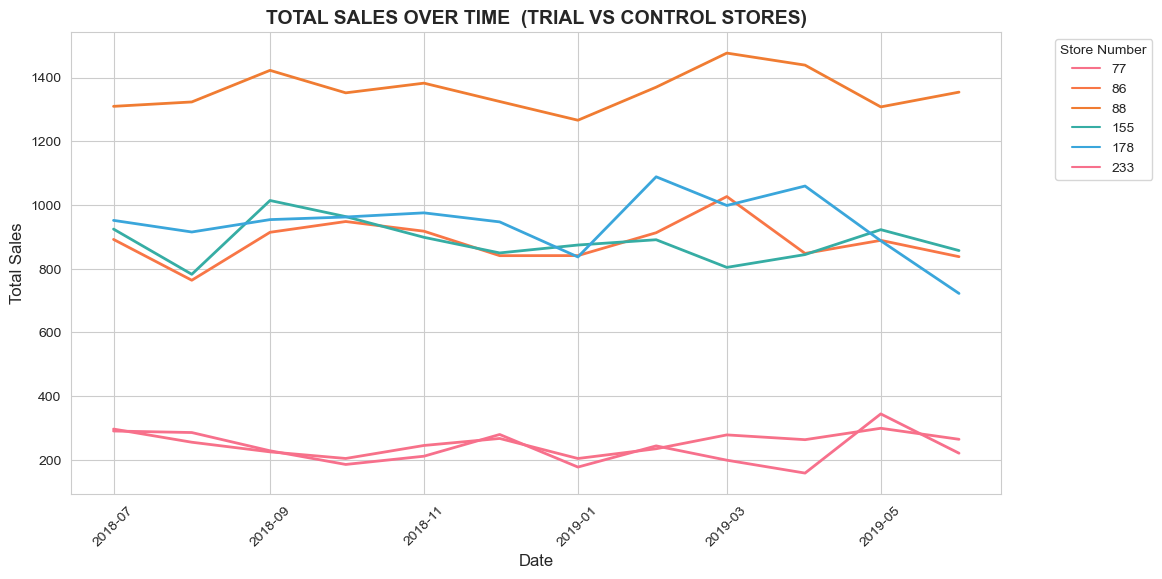

In [62]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.lineplot(data=filtered_data, x='YearMonth', y='totSales', hue='STORE_NBR', palette='husl', linewidth=2)
plt.title('TOTAL SALES OVER TIME  (TRIAL VS CONTROL STORES)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Store Number', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# CONDUCTING STATISTICAL TESTING (T-TEST FOR SIGNIFICANCE)

### creating required function

In [56]:
def perform_t_test(trial_store, control_store, df, metric):
    trial_values = df[df['STORE_NBR'] == trial_store][metric].values
    control_values = df[df['STORE_NBR'] == control_store][metric].values
    t_stat, p_value = ttest_ind(trial_values, control_values)
    return p_value

### running t-tests for all trial stores

In [57]:
for trial, control in control_store_mapping.items():
    p_value_sales = perform_t_test(trial, control, measure_over_time, 'totSales')
    p_value_customers = perform_t_test(trial, control, measure_over_time, 'nCustomers')
    print(f"Trial Store {trial} vs Control Store {control}:")
    print(f"P-Value (Sales): {p_value_sales}")
    print(f"P-Value (Customers): {p_value_customers}")
    print("---")

Trial Store 77 vs Control Store 233.0:
P-Value (Sales): 0.34360373343122186
P-Value (Customers): 0.43892961419410603
---
Trial Store 86 vs Control Store 155.0:
P-Value (Sales): 0.9843869025850827
P-Value (Customers): 0.16679506229806965
---
Trial Store 88 vs Control Store 178.0:
P-Value (Sales): 1.3787928775623651e-11
P-Value (Customers): 2.0416726827069008e-08
---


# CONCLUSION

In [58]:
print("Final Conclusion: Store trial analysis is completed successfully.")

Final Conclusion: Store trial analysis is completed successfully.


### sumerized findings from the trial period

In [59]:
for trial, control in control_store_mapping.items():
    p_value_sales = perform_t_test(trial, control, measure_over_time, 'totSales')
    p_value_customers = perform_t_test(trial, control, measure_over_time, 'nCustomers')
    
    print(f'Trial Store {trial} vs Control Store {control} Findings:')
    if p_value_sales < 0.05:
        print('- Significant increase in total sales during the trial period.')
    else:
        print('- No statistically significant increase in total sales')
        
    if p_value_customers < 0.05:
        print('- Significant increase in number of customers.')
    else:
        print('- No statistically significant increase in customer count.')
        
    print('- The main driver of change appears to be', 'customer growth' if p_value_customers < p_value_sales else 'increased spending per customer.')
    print('---')

Trial Store 77 vs Control Store 233.0 Findings:
- No statistically significant increase in total sales
- No statistically significant increase in customer count.
- The main driver of change appears to be increased spending per customer.
---
Trial Store 86 vs Control Store 155.0 Findings:
- No statistically significant increase in total sales
- No statistically significant increase in customer count.
- The main driver of change appears to be customer growth
---
Trial Store 88 vs Control Store 178.0 Findings:
- Significant increase in total sales during the trial period.
- Significant increase in number of customers.
- The main driver of change appears to be increased spending per customer.
---
